# 📊 Customer Churn Prediction

## Project Portfolio

**Objective:** Demonstrate ability to build an end-to-end data analysis and predictive modeling project.

**Business Question:**
👉 Can we predict which customers are likely to churn, and provide actionable insights to reduce churn?

## Project Workflow:
1️⃣ Define Problem  
2️⃣ Load & Clean Data  
3️⃣ Explore Data  
4️⃣ Statistical Testing  
5️⃣ Build Predictive Model  
6️⃣ Predict Risk Scores  
7️⃣ Conclusion & Business Recommendations  


## 1️⃣ Import Libraries (Purpose: Load Python tools needed for data analysis & modeling)

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

## 2️⃣ Load CSV (Purpose: Import raw dataset into DataFrame to prepare for cleaning & analysis)

In [2]:
project_root = os.path.abspath('..')  # Go up 1 level to project root
data_path = os.path.join(project_root, 'data', 'telco_churn.csv')

df = pd.read_csv(data_path)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## 3️⃣ Clean Data (Purpose: Prepare the dataset for analysis & modeling)
- Fix data types (TotalCharges)
- Handle missing values
- Encode categorical columns (gender, churn)

In [3]:
# Strip column names
df.columns = df.columns.str.strip()

# Clean Churn values
df['Churn'] = df['Churn'].str.strip()
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# Clean TotalCharges
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())

# Encode gender
df['gender'] = df['gender'].map({'Male': 1, 'Female': 0})

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,1,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,1,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,1,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,0,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


## 4️⃣ Explore Data (Purpose: Visualize key patterns & trends)
- Tenure vs Churn
- Monthly Charges vs Churn
- Identify segments with higher risk

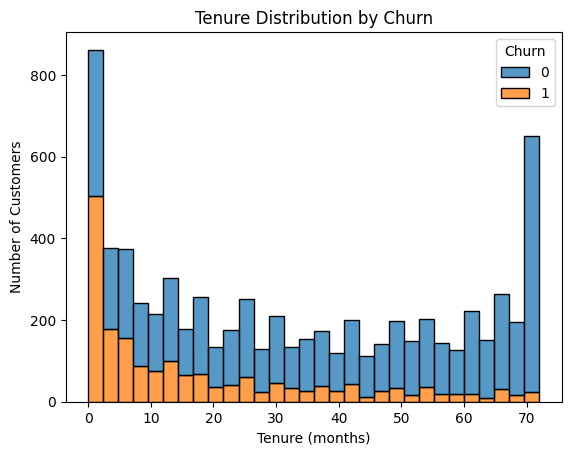

In [4]:
sns.histplot(data=df, x='tenure', hue='Churn', multiple='stack', bins=30)
plt.title('Tenure Distribution by Churn')
plt.xlabel('Tenure (months)')
plt.ylabel('Number of Customers')
plt.show()

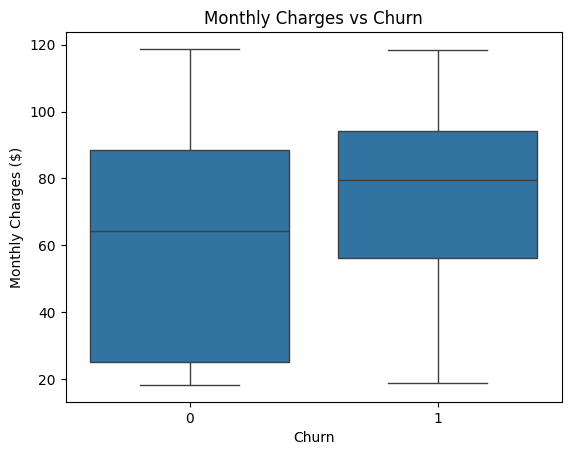

In [5]:
sns.boxplot(data=df, x='Churn', y='MonthlyCharges')
plt.title('Monthly Charges vs Churn')
plt.xlabel('Churn')
plt.ylabel('Monthly Charges ($)')
plt.show()

## 5️⃣ Statistical Testing (Purpose: Confirm if tenure difference is statistically significant)
👉 Perform independent T-test between churned & retained customers

In [6]:
churned = df[df['Churn'] == 1]['tenure']
retained = df[df['Churn'] == 0]['tenure']

t_stat, p_value = ttest_ind(churned, retained)
print(f"T-test p-value for tenure difference = {p_value:.4f}")

T-test p-value for tenure difference = 0.0000


## 6️⃣ Build Logistic Regression Model (Purpose: Predict likelihood of churn)

In [7]:
features = ['gender', 'SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']
X = df[features]
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[1420  119]
 [ 320  254]]

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.92      0.87      1539
           1       0.68      0.44      0.54       574

    accuracy                           0.79      2113
   macro avg       0.75      0.68      0.70      2113
weighted avg       0.78      0.79      0.78      2113



## 7️⃣ Predict Risk Scores (Purpose: Rank customers by risk of churn)
👉 Generate risk scores for each customer (Probability of churn)

In [8]:
df['RiskScore'] = model.predict_proba(X)[:, 1]
df[['customerID', 'RiskScore']].sort_values(by='RiskScore', ascending=False).head(10)

,customerID,RiskScore
6894,1400-MMYXY,0.855699
2208,7216-EWTRS,0.854986
5933,6496-SLWHQ,0.852056
1401,5419-CONWX,0.831455
2844,2265-CYWIV,0.829350
3380,5178-LMXOP,0.828635
4826,3389-YGYAI,0.824743
4800,9300-AGZNL,0.824192
31,4929-XIHVW,0.822655
1976,9497-QCMMS,0.822349


## ✅ Conclusion & Business Recommendations for Stakeholders

**Key Findings:**
- Shorter-tenure customers are more likely to churn
- Higher monthly charges correlate with higher churn risk
- Model provides risk scores with reasonable accuracy (see classification report)

**Recommendations:**
1. Launch targeted retention campaigns for customers in first 12 months of tenure
2. Offer discounts or service bundles to customers with high monthly charges
3. Use risk scores in CRM systems to proactively engage at-risk customers
4. Automate weekly churn monitoring dashboard for continuous tracking

---
🎓 This project demonstrates my skills in:
- Data cleaning & wrangling
- Exploratory data analysis (EDA)
- Statistical testing
- Predictive modeling
- Communicating insights to business stakeholders
